## Task 1: Import Libraries

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

# Task 2: Load the Data

In [3]:
# Load data
df = pd.read_csv('/home/injas/Documents/Data Enthusiast/Python Stuff/PythonCookBook/MyProject/LinearRegression/bike_sharing_data.txt')
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# Get the data's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


# Task 3: Visualize the Data

Text(0.5, 1.0, 'Profit in $10000s vs City Population in 10000s')

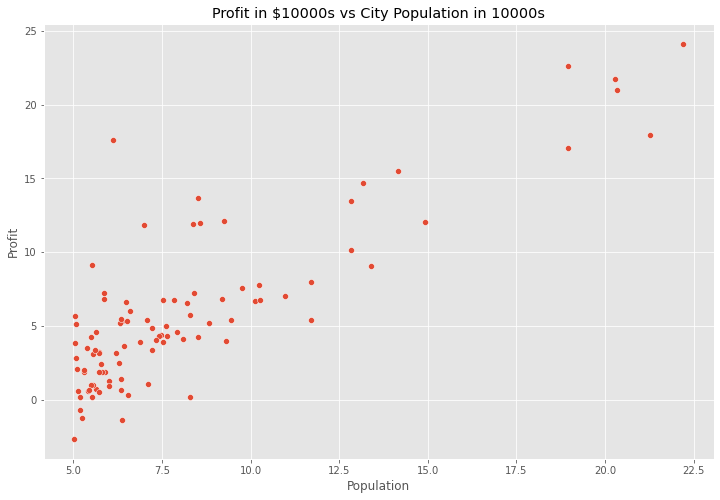

In [5]:
# Visualize the data.
ax = sns.scatterplot(x="Population", y="Profit", data=df)
ax.set_title("Profit in $10000s vs City Population in 10000s")

# Task 4: Compute the Cost

The objective of Linear Regression is to minimize the cost function.

![CostEquation](CostEquation.png)

[Click Me! About: Linear Regression](https://billyinn.wordpress.com/2014/07/12/coursera-machine-learning-lecture2-linear-regression-with-one-variable/)

In [6]:
# Implement the Cost Function
def cost_function(X, y, theta):
    m = len(y)
    y_prediction = X.dot(theta)
    error = (y_prediction - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [7]:
m = df['Population'].values.size
x = np.append(np.ones((m, 1)), df['Population'].values.reshape(m, 1), axis=1)
y = df['Profit'].values.reshape(m, 1)
theta = np.zeros((2,1))

cost_function(x, y, theta)

32.072733877455676

# Task 5: Gradient Descent

![Gradient Descent](gradientDescent.png)
[Click Me! About: Gradient Descent Algorithm](https://kousikk.wordpress.com/tag/gradient-descent/)

In [8]:
# Implement the gradient descent algorithm
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = [] 
    for i in range(iterations):
        y_prediction = X.dot(theta)
        error = np.dot(X.transpose(), (y_prediction - y))
        theta -= alpha * 1/m * error 
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [9]:
theta, costs = gradient_descent(x, y, theta, alpha=0.01, iterations=2000)

print("Hypothesis: h(x) = {x} + {y}x1".format(x=str(round(theta[0,0], 2)),
                                            y=str(round(theta[1,0], 2))))

Hypothesis: h(x) = -3.79 + 1.18x1


# Task 6: Visualising the Cost Function

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [56]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(x, y, t)

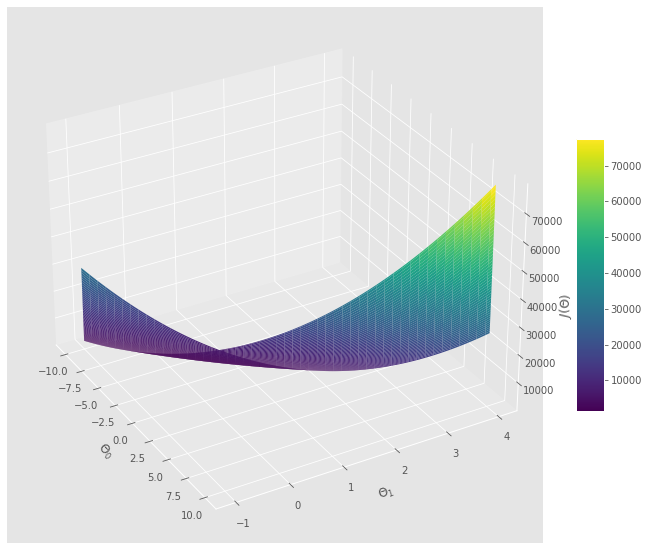

In [57]:
# Visualize 
fig = plt.figure(figsize= (12, 10))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

# Task 7: Plot the Convergence

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

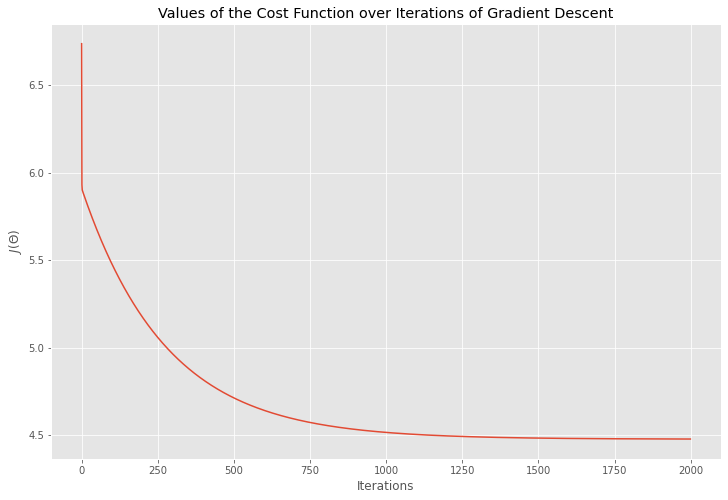

In [58]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent")

# Task 8: Training Data with Univariate Linear Regression Fit

In [59]:
# View the theta's shape
theta.shape

(2, 1)

In [60]:
# View the theta's value 
theta

array([[-3.78806857],
       [ 1.18221277]])

In [61]:
# Squeeze the theta dimension
theta = np.squeeze(theta)
theta

array([-3.78806857,  1.18221277])

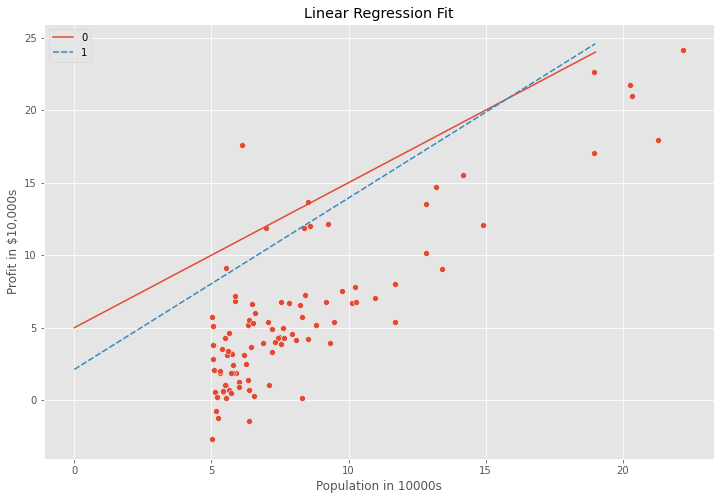

In [70]:
sns.scatterplot(x="Population", y="Profit", data=df)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot((x_value, y_value))

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit")
plt.show()

# Task 9: Inference using the optimized Theta values

In [71]:
def predict(x, theta):
    y_prediction = np.dot(theta.transpose(), x)
    return y_prediction

In [72]:
y_pred1 = predict(np.array([1, 4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $"+str(round(y_pred1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [79]:
y_pred2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $"+str(round(y_pred2, 0)))

For a population of 83,000 people, the model predicts a profit of $60243.0
